In [1]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Folder containing your .pt result files
results_dir = "./results"  # Change to your actual path

methods = ["SJLT", "FJLT", "Gaussian"]
dims = [2048, 4096, 8192]

# Initialize dictionaries to store the results
lds_data = {method: [] for method in methods}
proj_time_data = {method: [] for method in methods}

# Load results from files
for method in methods:
    for dim in dims:
        filename = f"{method}-{dim}.pt"
        filepath = os.path.join(results_dir, filename)
        if os.path.exists(filepath):
            data = torch.load(filepath)
            lds_data[method].append(data["lds"])
            proj_time_data[method].append(data["proj_time"])
            damping = data["best_damping"]
            print(f"Setting: {method}-{dim}: with damping {damping}")
        else:
            print(f"Warning: {filepath} not found!")

Setting: SJLT-2048: with damping 0.1
Setting: SJLT-4096: with damping 0.1
Setting: SJLT-8192: with damping 0.1
Setting: FJLT-2048: with damping 100.0
Setting: FJLT-4096: with damping 100.0
Setting: FJLT-8192: with damping 100.0
Setting: Gaussian-2048: with damping 0.1
Setting: Gaussian-4096: with damping 0.1
Setting: Gaussian-8192: with damping 0.1


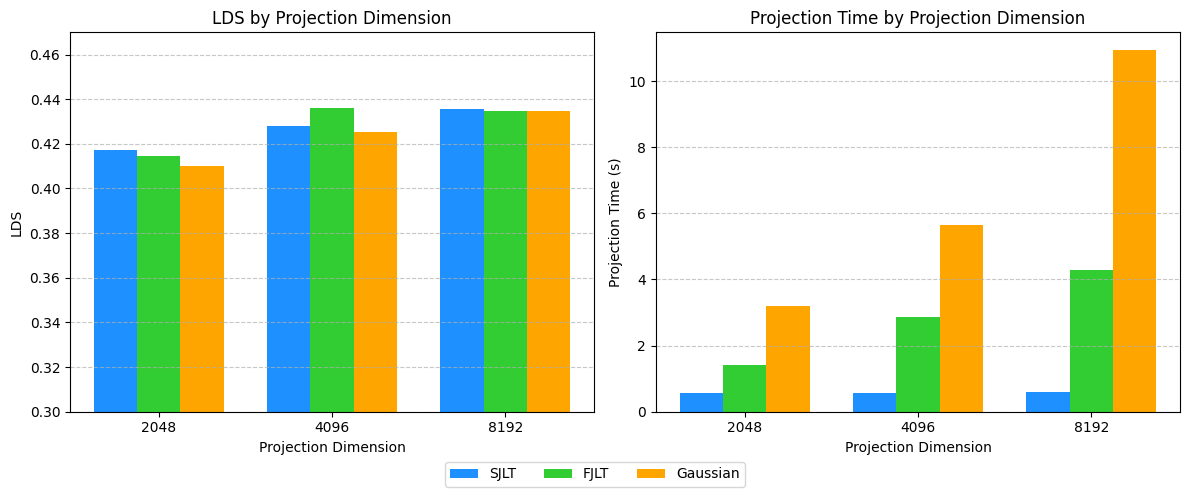

In [3]:
# Bar plot setup
x = np.arange(len(dims))  # one x location per projection dimension
width = 0.25  # Adjusted to fit 3 bars

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Colors for methods
colors = {
    "SJLT": 'dodgerblue',
    "FJLT": 'limegreen',
    "Gaussian": 'orange'
}

# LDS subplot
axs[0].bar(x - width, lds_data["SJLT"], width, label="SJLT", color=colors["SJLT"])
axs[0].bar(x, lds_data["FJLT"], width, label="FJLT", color=colors["FJLT"])
axs[0].bar(x + width, lds_data["Gaussian"], width, label="Gaussian", color=colors["Gaussian"])
axs[0].set_title("LDS by Projection Dimension")
axs[0].set_xlabel("Projection Dimension")
axs[0].set_ylabel("LDS")
axs[0].set_xticks(x)
axs[0].set_xticklabels(dims)
axs[0].set_ylim(0.3, 0.47)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Projection Time subplot
axs[1].bar(x - width, proj_time_data["SJLT"], width, color=colors["SJLT"])
axs[1].bar(x, proj_time_data["FJLT"], width, color=colors["FJLT"])
axs[1].bar(x + width, proj_time_data["Gaussian"], width, color=colors["Gaussian"])
axs[1].set_title("Projection Time by Projection Dimension")
axs[1].set_xlabel("Projection Dimension")
axs[1].set_ylabel("Projection Time (s)")
axs[1].set_xticks(x)
axs[1].set_xticklabels(dims)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add shared legend
fig.legend(["SJLT", "FJLT", "Gaussian"], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.03))

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for legend
plt.show()